In [1]:
from keras.datasets import cifar10
from keras.layers import Dropout
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.constraints import maxnorm
import scipy.misc  as misc
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Nadam
from keras.layers.convolutional import Conv2D

Load the data

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

Visualize some samples from the data

In [3]:
x_train[0].shape

(32, 32, 3)

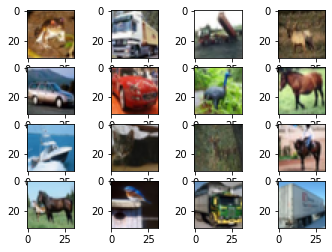

In [4]:
fig = plt.figure()
gs = gridspec.GridSpec(4,4,wspace = 0.0)
ax = [plt.subplot(gs[i]) for i in range(4*4)]

for i in range(16):
    ax[i].imshow(x_train[i])
plt.show()

Now convert the class to one hot encoding matrix

In [5]:
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)
y_train_onehot.shape

(50000, 10)

We can use simple CNN architecture to start. In this example we will use two
convolutional layers and a max pooling

In [6]:
# Create the model
#Sequential model is selected to get a stack of layers.
num_classes = 10
model = Sequential()

#first convulutional layer
model.add(Conv2D(32,(3,3),padding = 'same' ,input_shape = (32,32,3),activation = 'relu'))

#second convulution layer
model.add(Conv2D(32,(3,3),padding = 'same',activation = 'relu'))

#pooling
model.add(MaxPooling2D(pool_size = (2,2)))

#flatten the output
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))

#output class
model.add(Dense(num_classes,activation = 'softmax'))

#compile variables
epochs = 50
lrate = 0.05



#compile the model
model.compile(loss = 'categorical_crossentropy',optimizer = 'Nadam',metrics = ['accuracy'] )

#print summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

Fitting the model (It will take time because the process is heavy)

In [7]:
model.fit(x_train,y_train_onehot,validation_data = (x_test,y_test_onehot),epochs = epochs ,batch_size = 100)

Epoch 1/50
500/500 [==============================] - 168s 334ms/step - loss: 3.9715 - accuracy: 0.3992 - val_loss: 1.3897 - val_accuracy: 0.4990
Epoch 2/50
500/500 [==============================] - 170s 341ms/step - loss: 1.1773 - accuracy: 0.5902 - val_loss: 1.3082 - val_accuracy: 0.5355
Epoch 3/50
500/500 [==============================] - 168s 335ms/step - loss: 0.7955 - accuracy: 0.7248 - val_loss: 1.3430 - val_accuracy: 0.5708
Epoch 4/50
500/500 [==============================] - 168s 335ms/step - loss: 0.4710 - accuracy: 0.8387 - val_loss: 1.5660 - val_accuracy: 0.5778
Epoch 5/50
500/500 [==============================] - 168s 336ms/step - loss: 0.2616 - accuracy: 0.9148 - val_loss: 1.8797 - val_accuracy: 0.5635
Epoch 6/50
500/500 [==============================] - 168s 336ms/step - loss: 0.1741 - accuracy: 0.9431 - val_loss: 2.1601 - val_accuracy: 0.5690
Epoch 7/50
500/500 [==============================] - 167s 335ms/step - loss: 0.1610 - accuracy: 0.9479 - val_loss: 2.4299 -

In [9]:
loss,accuracy = model.evaluate(x_test,y_test_onehot)

313/313 [==============================] - 7s 19ms/step - loss: 10.5409 - accuracy: 0.4850


In [10]:
print('Accuracy:{:.4f}%'.format(accuracy *100))

Accuracy:48.5000%
